## 1. 파일 불러오기

In [1]:
# 마에스트로 노트북 파일불러오기
import pandas as pd
avocado=pd.read_csv("C:/Users/CPB02GameN/Desktop/avocado project/파이썬활용발표 포함avocado project 2(0626~)/avocadofinalchange.csv",index_col = "Unnamed: 0")

In [ ]:
# 집노트북으로 파일 불러오기
avocado=pd.read_csv("C:/Users/사용자/Desktop/과제/마에스트로 과제/avocado project/최종수정데이터/avocado1.csv",index_col = "Unnamed: 0")

### 1) avocado AveragePrice 시계열 그래프

In [2]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


groupBy_whole = avocado.groupby('Date').mean()
scatter = go.Scatter(x=groupBy_whole.AveragePrice.index, y=groupBy_whole.AveragePrice)
data = [scatter]
layout=go.Layout(title="Time Series Plot for Mean Daily Price across all regions", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### 2) avocado type 별 histogram

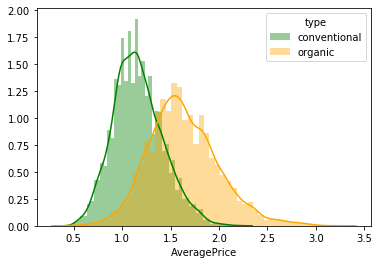

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(avocado[avocado.type == "conventional"]["AveragePrice"], 
             color="green", label="conventional")

sns.distplot(avocado[avocado.type == "organic"]["AveragePrice"], 
             color="orange", label="organic")

plt.legend(title="type")
#plt.show()

### 3) avocado type 별 시계열그래프

In [4]:
conventional = avocado[avocado.type=="conventional"]
organic = avocado[avocado.type=="organic"]

In [5]:
groupBy1_price = conventional.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")
groupBy2_price = organic.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")
data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot for Mean Daily Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### avocado 상관관계 그래프

In [6]:
data = avocado.copy()
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()   #문자를 숫자로 맵핑
label1 = LabelEncoder()
label2 = LabelEncoder()
dicts = {}
dicts1 = {}
dicts2 = {}

In [7]:
label.fit(data.type.drop_duplicates()) 
label1.fit(data.season.drop_duplicates()) 
label2.fit(data.region.drop_duplicates())

LabelEncoder()

In [8]:
dicts['type'] = list(label.classes_)
dicts['type']
dicts['season'] = list(label1.classes_)
dicts['season']
dicts['region'] = list(label2.classes_)
dicts['region']

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'WestTexNewMexico']

In [9]:
data.type = label.transform(data.type) 
data.season = label1.transform(data.season)
data.region = label2.transform(data.region)

In [10]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
month             int64
season            int32
dtype: object

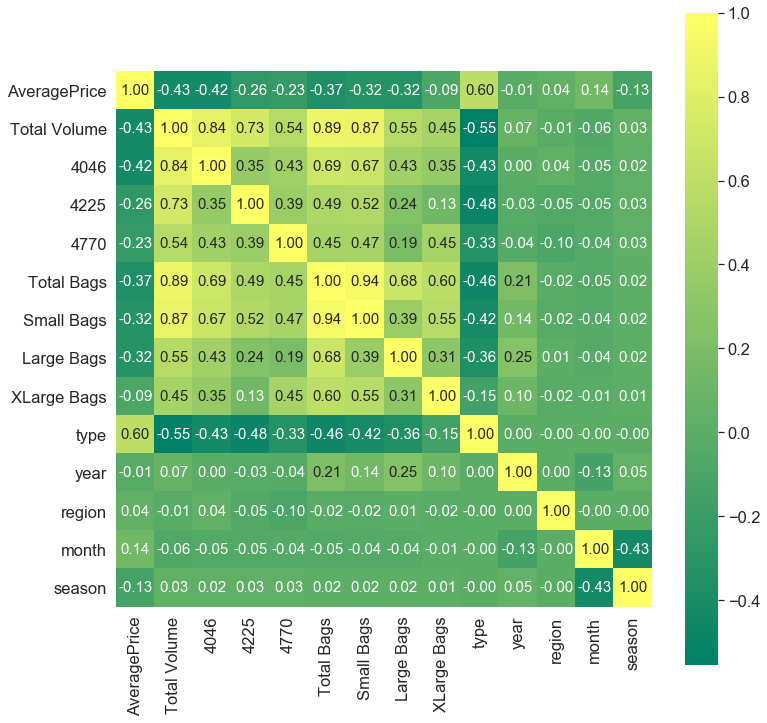

In [11]:
import numpy as np
import seaborn as sns
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year','region', 'month', 'season']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm,cmap='summer',cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols,ax=ax)
